In [1]:
conda install pymongo

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
yelp_db = client['yelp']
reviews_table = yelp_db['reviews']

In [4]:
import json
with open('yelp_dataset/review.json', 'r') as f:
    for line in f:
        review = json.loads(line)
        reviews_table.insert(review)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [7]:
cur = reviews_table.find().limit(10)
for r in cur:
    print(r)

{'_id': ObjectId('5e028c56e1e16cd99779a346'), 'review_id': 'Q1sbwvVQXV2734tPgoKj4Q', 'user_id': 'hG7b0MtEbXx5QzbzE6C_VA', 'business_id': 'ujmEBvifdJM6h6RLv4wQIg', 'stars': 1.0, 'useful': 6, 'funny': 1, 'cool': 0, 'text': 'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.', 'date': '2013-05-07 04:34:36'}
{'_id': ObjectId('5e028c56e1e16cd99779a347'), 'review_id': 'GJXCdrto3ASJOqKeVWPi6Q', 'user_id': 'yXQM5uF2jS6es16SJzNHfg', 'business_id': 'NZnhc2sEQy3RmzKTZnqtwQ', 'stars': 5.0, 'useful': 0, 'funny': 0, 'cool': 0, 'text': "I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon!  I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  \n\nTravis's greets you with his perfectly green swoosh in his otherwise perfectly styled blac

In [8]:
business_table = yelp_db['business']
with open('yelp_dataset/business.json', 'r') as f:
    for line in f:
        business = json.loads(line)
        business_table.insert(business)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [9]:
checkin_table = yelp_db['checkin']
with open('yelp_dataset/checkin.json', 'r') as f:
    for line in f:
        checkin = json.loads(line)
        checkin_table.insert(checkin)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [10]:
tip_table = yelp_db['tip']
with open('yelp_dataset/tip.json', 'r') as f:
    for line in f:
        tip = json.loads(line)
        tip_table.insert(tip)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [11]:
user_table = yelp_db['user']
with open('yelp_dataset/user.json', 'r') as f:
    for line in f:
        user = json.loads(line)
        user_table.insert(user)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [15]:
import pandas as pd

review_df = pd.DataFrame(list(reviews_table.find()))
business_df = pd.DataFrame(list(business_table.find()))
checkin_df = pd.DataFrame(list(checkin_table.find()))
tip_df = pd.DataFrame(list(tip_table.find()))
user_df = pd.DataFrame(list(user_table.find()))

In [48]:
business_df.head(266)

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,5e02afa7e1e16cd997dfa812,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,5e02afa7e1e16cd997dfa813,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,5e02afa7e1e16cd997dfa814,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,5e02afa7e1e16cd997dfa815,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,5e02afa7e1e16cd997dfa816,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,5e02afa7e1e16cd997dfa917,ET2dIIR1qMThKyBEOL5BkA,Four Mile Creek Greenway - Matthews,1631 Pleasant Plains Rd,Matthews,NC,28105,35.099609,-80.722877,5.0,12,1,"{'BikeParking': 'True', 'GoodForKids': 'True',...","Hiking, Active Life",None
262,5e02afa7e1e16cd997dfa918,lrYB3RSnr8OVrrqHhGMwPA,Sinaloa Tacos 2,2722 E Lake Mead Blvd,North Las Vegas,NV,89030,36.196168,-115.110886,1.5,3,1,{'BusinessAcceptsCreditCards': 'True'},"Specialty Food, Imported Food, Ethnic Food, Food",None
263,5e02afa7e1e16cd997dfa919,CxRBRrtd7NHz890gWPG9AA,La Casa d'Italia Ristorante,2820 Centre St NE,Calgary,AB,T2E 2V8,51.077843,-114.062521,4.0,4,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Italian, Restaurants, Event Planning & Service...","{'Tuesday': '17:0-22:0', 'Wednesday': '17:0-22..."
264,5e02afa7e1e16cd997dfa91a,jZ23B--fu21is2zrWiy4Kg,Parker Pet Care,68 Floral Parkway,North York,ON,M6L 2B9,43.722963,-79.474947,4.0,18,1,None,"Pet Groomers, Pets, Pet Sitting, Pet Services","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."


In [74]:
import numpy as np

business_df = business_df.dropna(subset=['categories'])
restaurant_df = business_df[business_df['categories'].str.contains('Restaurants')]
restaurant_df

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,5e02afa7e1e16cd997dfa813,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,5e02afa7e1e16cd997dfa814,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
11,5e02afa7e1e16cd997dfa81d,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
13,5e02afa7e1e16cd997dfa81f,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
17,5e02afa7e1e16cd997dfa823,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192587,5e02b074e1e16cd997e2985d,oS0CnUbyv0GUoD3L8_3UPQ,Thai Fantasy,578 Yonge Street,Toronto,ON,M4Y 1Z3,43.665120,-79.384809,4.0,113,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Restaurants, Thai","{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ..."
192589,5e02b074e1e16cd997e2985f,ghovD5ZTGDQ5Q2U4ERddWw,Five Guys,3863 Medina Rd,Fairlawn,OH,44333,41.136561,-81.639712,4.0,22,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Burgers, Restaurants, Fast Food, American (New)","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
192595,5e02b074e1e16cd997e29865,h3QErqS3OZgLJ5Tb6-sLyQ,Asia Hut,1450 Kingston Rd,Pickering,ON,L1V 1C1,43.841844,-79.083881,4.5,4,1,"{'BikeParking': 'True', 'RestaurantsAttire': '...","Restaurants, Soup, Chinese, Caribbean","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
192596,5e02b074e1e16cd997e29866,KnafX7T6qSAmSrLhd709vA,Pho Maisonneuve,948 Boulevard de Maisonneuve Est,Montréal,QC,H2L 1Z1,45.517430,-73.558873,4.0,25,1,"{'GoodForKids': 'True', 'WiFi': 'u'no'', 'Rest...","Vietnamese, Soup, Restaurants","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."


In [75]:
review_df.head(10)

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,5e028c56e1e16cd99779a346,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,5e028c56e1e16cd99779a347,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,5e028c56e1e16cd99779a348,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,5e028c56e1e16cd99779a349,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,5e028c56e1e16cd99779a34a,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38
5,5e028c56e1e16cd99779a34b,fdiNeiN_hoCxCMy2wTRW9g,w31MKYsNFMrjhWxxAb5wIw,eU_713ec6fTGNO4BegRaww,4.0,0,0,0,I'll be the first to admit that I was not exci...,2013-01-20 13:25:59
6,5e028c56e1e16cd99779a34c,G7XHMxG0bx9oBJNECG4IFg,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,5,4,5,Tracy dessert had a big name in Hong Kong and ...,2016-05-07 01:21:02
7,5e028c56e1e16cd99779a34d,8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,This place has gone down hill. Clearly they h...,2010-10-05 19:12:35
8,5e028c56e1e16cd99779a34e,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2.0,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18
9,5e028c56e1e16cd99779a34f,RS_GTIT6836bCaPy637kNQ,nMeCE5-xsdleyxYuNZ_7rA,oxwGyA17NL6c5t1Etg5WgQ,3.0,1,0,1,It's a giant Best Buy with 66 registers. I do...,2012-02-29 21:52:43


In [76]:
business_review = pd.merge(restaurant_df, review_df, left_on='business_id', right_on='business_id')
business_review

,_id_x,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,hours,_id_y,review_id,user_id,stars_y,useful,funny,cool,text,date
0,5e02afa7e1e16cd997dfa813,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e028c5fe1e16cd99779c4e7,6W0MQHmasK0IsaoDo4bmkw,2K62MJ4CJ19L8Tp5pRfjfQ,3.0,3,2,0,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30
1,5e02afa7e1e16cd997dfa813,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e028c69e1e16cd99779e6ab,BeeBfUxvzD4qNX4HxrgA5g,A0kENtCCoVT3m7T35zb2Vg,3.0,0,0,0,We've always been there on a Sunday so we were...,2013-06-24 23:11:30
2,5e02afa7e1e16cd997dfa813,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e028c70e1e16cd99779fee6,A1D2kUnZ0HTroFreAheNSg,SuOLY03LW5ZcnynKhbTydA,3.0,0,0,0,"***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22
3,5e02afa7e1e16cd997dfa813,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e028c72e1e16cd9977a03c6,2pf45Stf-pNew-xgTababQ,lymyUak6KNcNKoDbK87MiQ,1.0,1,0,0,"Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43
4,5e02afa7e1e16cd997dfa813,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e028c78e1e16cd9977a1af2,RHhlmL07evgAdPaXQV8Omg,6vU0I5XgCv9OQHZ76rV6qw,4.0,2,1,2,One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4201679,5e02b074e1e16cd997e2986d,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e02a7dce1e16cd997de306d,DGwxHd3N8kJNs9GRnxp09A,ZO8h27XOn_XFKLLRRrLp0g,5.0,2,1,0,When I write a review on someplace that I have...,2013-05-03 18:57:28
4201680,5e02b074e1e16cd997e2986d,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e02a7e0e1e16cd997de4045,xpfvecUdqyTug6ahkWQ9SQ,mwual7bROpwhZ3fu_GiPtQ,5.0,1,0,0,We stopped in at Tre Belle on a Tuesday evenin...,2013-12-04 01:16:42
4201681,5e02b074e1e16cd997e2986d,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e02a82fe1e16cd997df635c,5vt9FZre5dqksWzpj-8gCg,WKneD6tKr18q0ey0QbHBaA,3.0,1,0,0,I wasnt impressed. The place is beautiful and ...,2012-04-25 16:51:38
4201682,5e02b074e1e16cd997e2986d,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e02a83fe1e16cd997df9d8f,gLKSsgs4t2XPvfg6wOPuEQ,PxB2oZXO9N_4Zo2VIPUuGA,1.0,1,0,0,Last night some friends and I dined at this es...,2018-02-22 22:32:44


In [149]:
most_reviews = restaurant_df.sort_values(by=['review_count'], ascending=False).head(50)
most_reviews.state.unique()

state = []

for s in most_reviews.state.unique():
    state.append(s)
    
state

['NV', 'AZ']

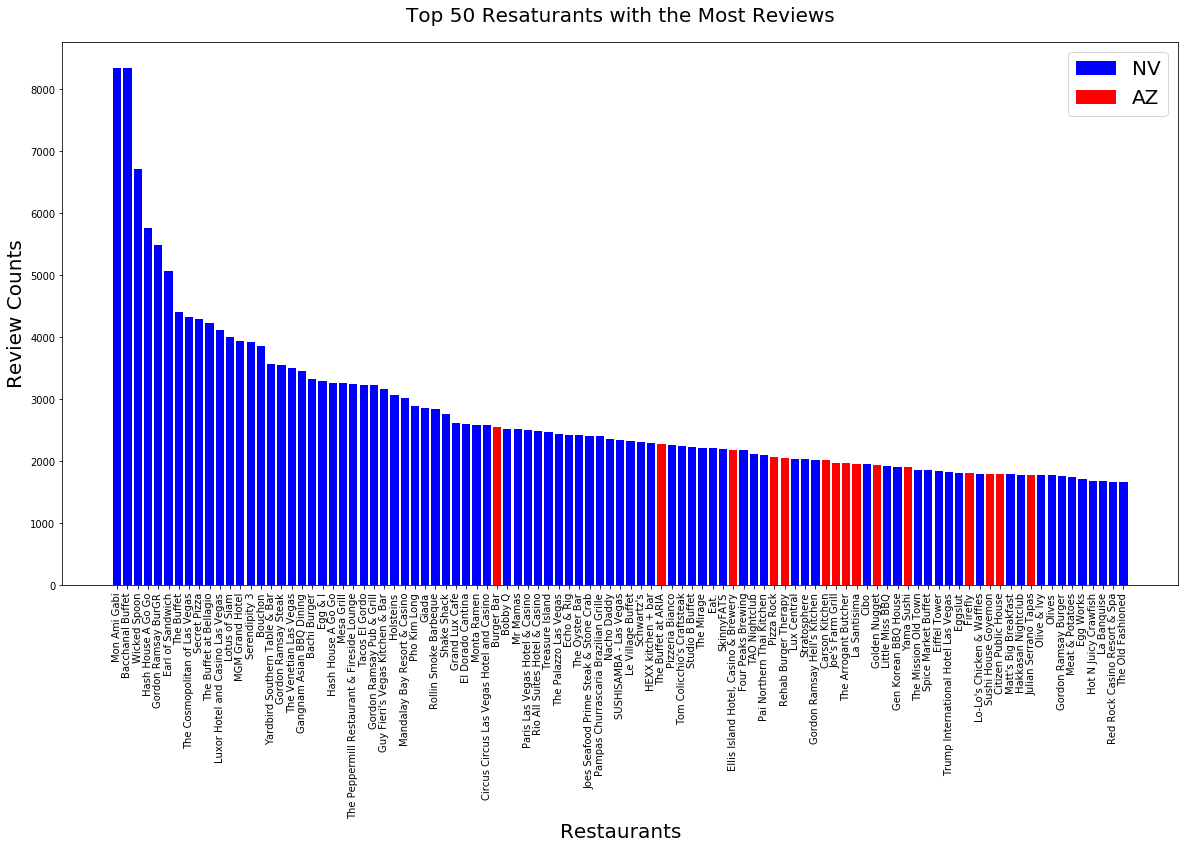

In [168]:
# colors = ['blue', 'green', 'red', 'brown', 'cyan', 'purple']
import matplotlib.pyplot as plt

az = most_reviews[most_reviews['state'] == 'AZ']

fig, ax = plt.subplots(figsize=[20,10])
ax.set_title('Top 50 Resaturants with the Most Reviews', fontsize=20, pad=20)
ax.bar(most_reviews['name'], most_reviews['review_count'], color= 'blue', label='NV')
ax.bar(az['name'], az['review_count'], color='red', label='AZ')
ax.set_xticklabels(most_reviews['name'], rotation=90)
ax.set_xlabel('Restaurants', fontsize=20)
ax.set_ylabel('Review Counts', fontsize=20)
plt.legend(fontsize=20)

plt.savefig('images/top_50_restaurants.png', bbox_inches = "tight")

In [151]:
most_reviews = restaurant_df.sort_values(by=['review_count'], ascending=False).head(100)
most_reviews.state.unique()

state = []

for s in most_reviews.state.unique():
    state.append(s)
    
state

['NV', 'AZ', 'QC', 'ON', 'PA', 'WI']

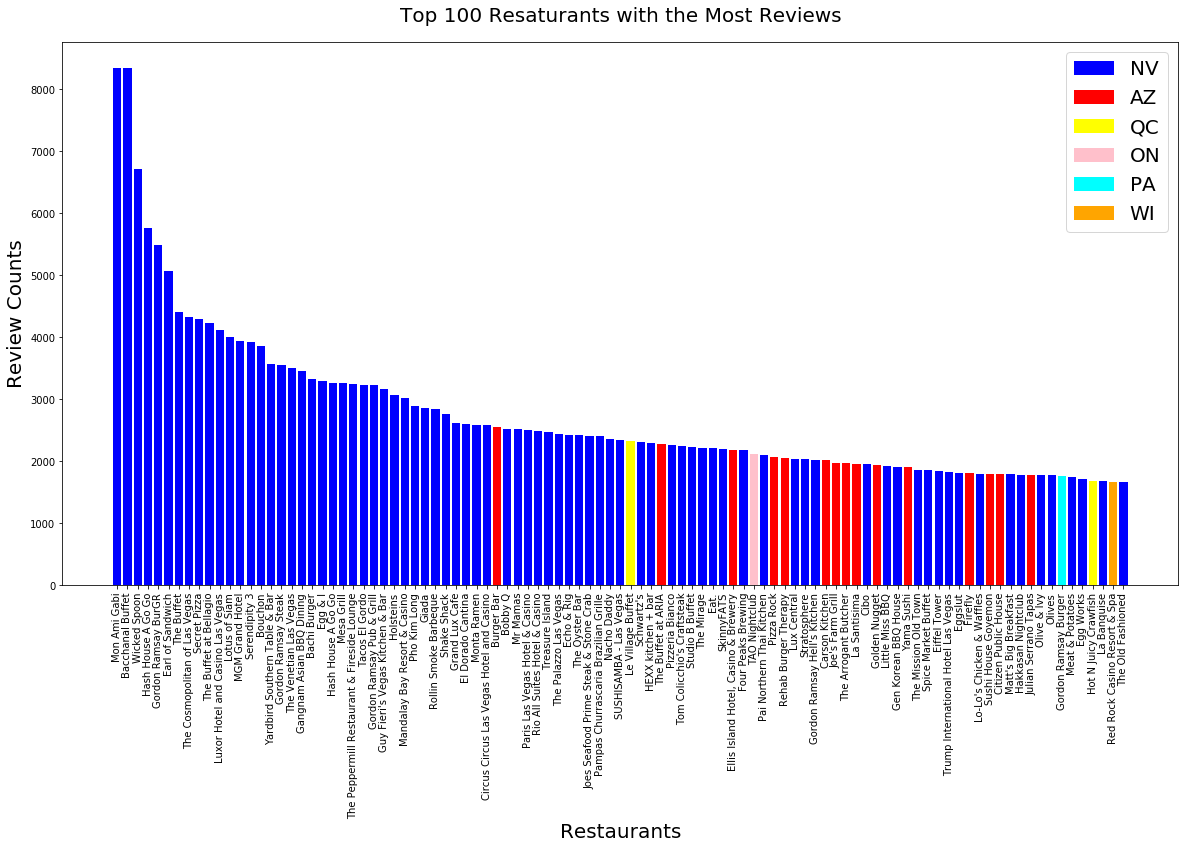

In [170]:
colors = ['blue', 'red', 'yellow', 'pink', 'cyan', 'orange']
import matplotlib.pyplot as plt

st = {}
for idx, s in enumerate(state):
    st[idx] = most_reviews[most_reviews['state'] == s]

fig, ax = plt.subplots(figsize=[20,10])
ax.set_title('Top 100 Resaturants with the Most Reviews', fontsize=20, pad=20)
ax.bar(most_reviews['name'], most_reviews['review_count'])
for idx, s in enumerate(state):
    ax.bar(st[idx]['name'], st[idx]['review_count'], color=colors[idx], label=s)
ax.set_xticklabels(most_reviews['name'], rotation=90)
ax.set_xlabel('Restaurants', fontsize=20)
ax.set_ylabel('Review Counts', fontsize=20)
plt.legend(fontsize=20)

plt.savefig('images/top_100_restaurants.png', bbox_inches = "tight")

In [172]:
states_review = business_review.groupby('state')
src = states_review.count()['review_id']
src

state
AB       64029
AL           3
AR           7
AZ     1191691
BC           3
CA           4
CON          3
FL          10
IL       28741
NC      272619
NE           8
NM          14
NV     1391673
NY          95
OH      227182
ON      574245
PA      204438
QC      137992
SC       14401
TX        1010
VA           9
VT           5
WA           3
WI       93488
XGM          3
XWY          8
Name: review_id, dtype: int64

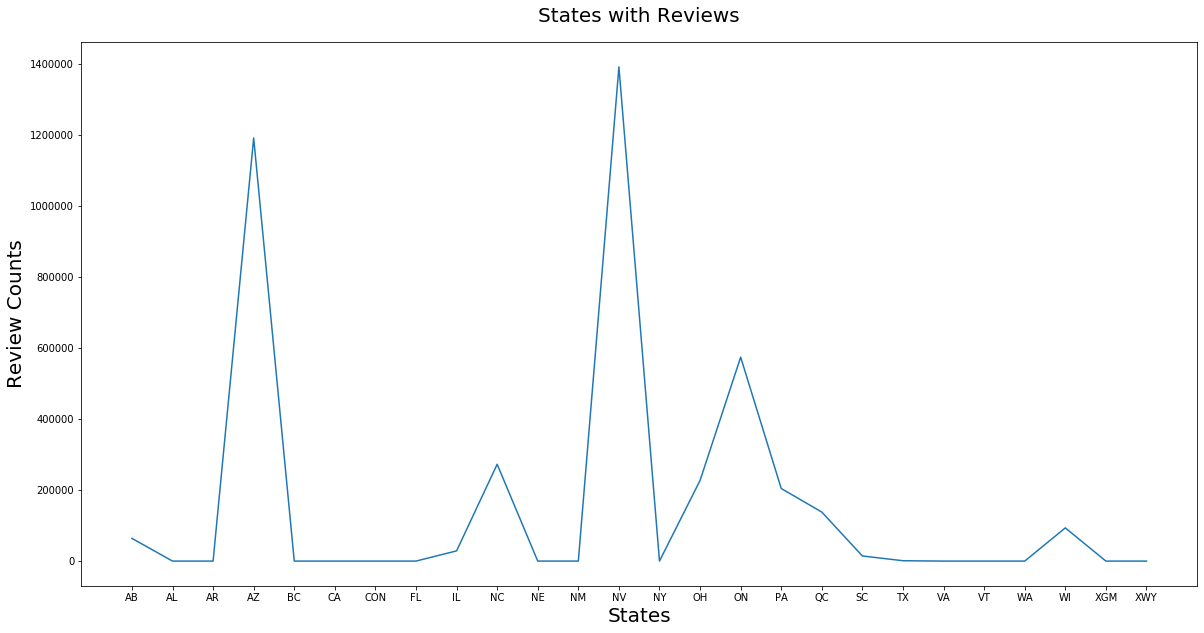

In [173]:
fig, ax = plt.subplots(figsize=[20, 10])

ax.set_title('States with Reviews', fontsize=20, pad=20)
ax.set_xlabel('States', fontsize=20)
ax.set_ylabel('Review Counts', fontsize=20)
ax.plot(src)

plt.savefig('images/states_with_reviews.png', bbox_inches = "tight")